**Photo stitching**

Approach:

1- Use a pair of custom images (different from the ones provided). The two images must have a partial overlap


2- Extract keypoints and find matches (no sorting/filtering matches is needed here)


3- Find the homography which describes the transformation from the second set of points to the first one


4- Apply the homography to the second image


5- Integrate the first image

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv # OpenCV

# Verify OpenCV version
print(cv.__version__)

4.10.0


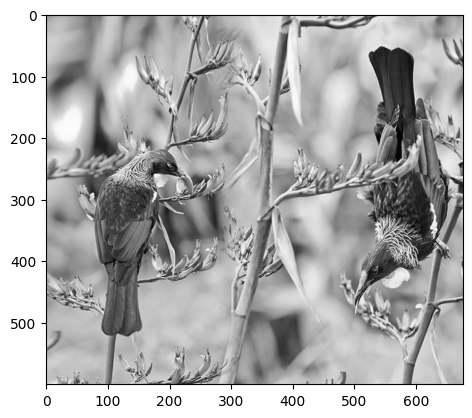

In [2]:
bird1 = cv.imread('bird1.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(bird1, cmap='gray'); plt.show()

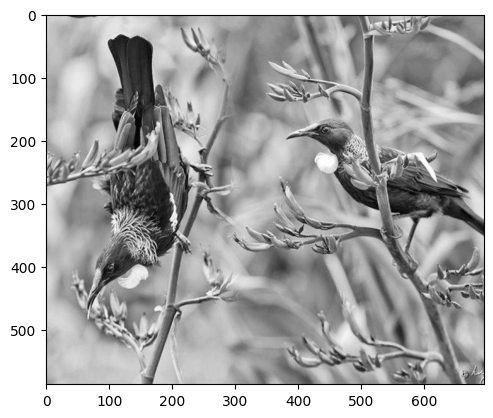

In [3]:
bird3 = cv.imread('bird3.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(bird3, cmap='gray'); plt.show()

In [4]:
#SIFT detection and description
sift = cv.SIFT_create()

In [5]:
(kps1, features1) = sift.detectAndCompute(bird1, None)
(kps3, features3) = sift.detectAndCompute(bird3, None)

print("Keypoints Boat 1 :", len(kps1), ", and descriptors", features1.shape[1])
print("Keypoints Boat 3 :", len(kps3), ", and descriptors", features1.shape[1])

Keypoints Boat 1 : 2227 , and descriptors 128
Keypoints Boat 3 : 2468 , and descriptors 128


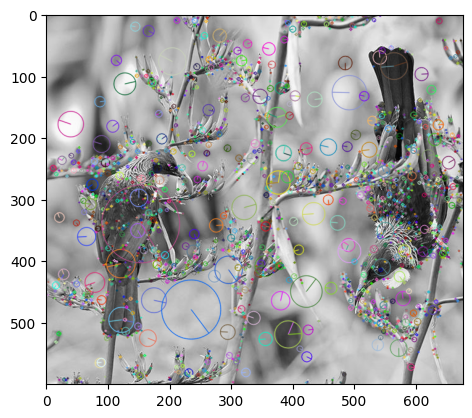

In [6]:
bird1_kps = cv.drawKeypoints(bird1, kps1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(bird1_kps); plt.show()

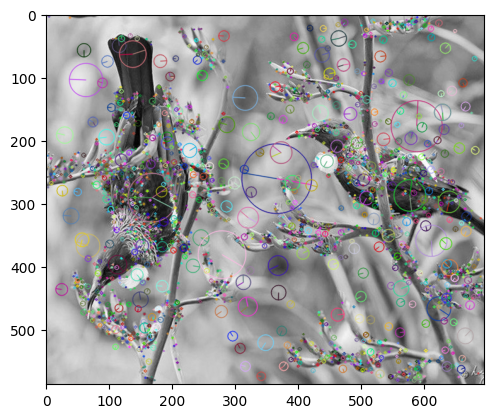

In [7]:
bird3_kps = cv.drawKeypoints(bird3, kps3, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(bird3_kps); plt.show()

In [8]:
bf = cv.BFMatcher.create(crossCheck=True)
matches = bf.match(features1, features3)

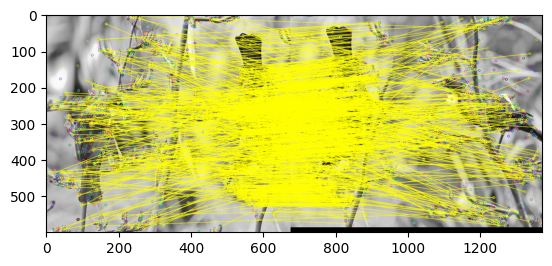

In [9]:
# Visualization of the matches
result = cv.drawMatches(bird1, kps1, bird3, kps3, matches, None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

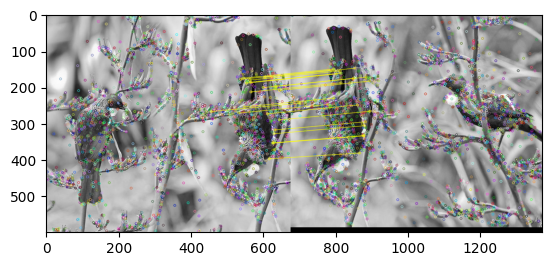

In [10]:
matches = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(bird1, kps1, bird3, kps3, matches[0:20], None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

In [11]:
def myHomography(kps1, kps3, matches):
    pts1 = np.float32([kps1[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kps3[m.trainIdx].pt for m in matches])

    H, status = cv.findHomography(pts2, pts1, cv.RANSAC)

    return H

In [12]:
H = myHomography(kps1, kps3, matches)
H

array([[ 9.98869316e-01,  1.52635754e-01,  4.21360731e+02],
       [-5.29396944e-03,  1.08793852e+00,  1.77779743e+01],
       [-5.67746678e-05,  2.54871946e-04,  1.00000000e+00]])

Apply the homography

In [13]:
def myWarp(im, H, ref_image):
    height, width = ref_image.shape[:2]
    warped_image = cv.warpPerspective(im, H, (width * 2, height))
    return warped_image

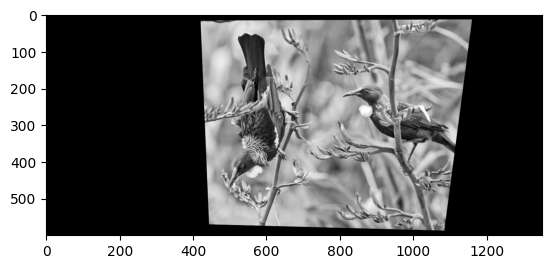

In [14]:
temp = myWarp(bird3, H, bird1)
plt.imshow(temp, cmap='gray');
plt.show()

In [15]:
bird3_warped = myWarp(bird3, H, bird1)
bird3_warped[0:bird1.shape[0], 0:bird1.shape[1]] = bird1

In [16]:
def myCollage(im_iniz, im_fin):
  collaged = im_iniz.copy()
  collaged[0:im_iniz.shape[0], 0:im_iniz.shape[1]] = im_iniz
  return collaged

In [17]:
result = myCollage(bird3_warped, bird1)


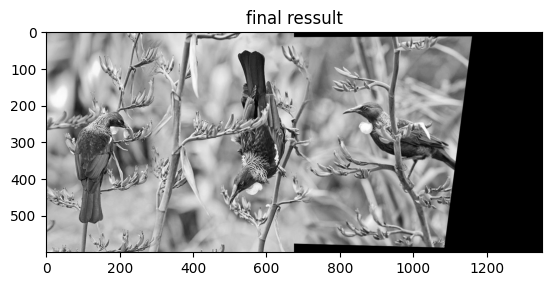

In [18]:
plt.imshow(result, cmap='gray')
plt.title('final ressult')
plt.show()